In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import xgboost
from pandas import read_csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
df_new = read_csv("new_Basetrain.csv")
df_new.head(5)

,Id,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,SalePriceLog,T_garage,T_Overall,target
0,1,856,854,0,1,3,0,4,3,706.0,...,856,0,2003,2003,2,2566.0,12.247694,14.0,11,208500.0
1,2,1262,0,0,1,3,0,4,1,978.0,...,1262,298,1976,1976,1,2524.0,12.109011,14.0,13,181500.0
2,3,920,866,0,1,3,0,4,2,486.0,...,920,0,2001,2002,2,2706.0,12.317167,14.0,11,223500.0
3,4,961,756,0,1,3,0,1,3,216.0,...,961,0,1915,1970,0,2473.0,11.849398,16.0,11,140000.0
4,5,1145,1053,0,1,4,0,4,0,655.0,...,1145,192,2000,2000,2,3343.0,12.429216,15.0,12,250000.0


In [11]:
df_kagg = read_csv("new_kaggtest.csv")
df_kagg.shape

(1459, 83)

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 85 columns):
Id               1453 non-null int64
1stFlrSF         1453 non-null int64
2ndFlrSF         1453 non-null int64
3SsnPorch        1453 non-null int64
Alley            1453 non-null int64
BedroomAbvGr     1453 non-null int64
BldgType         1453 non-null int64
BsmtCond         1453 non-null int64
BsmtExposure     1453 non-null int64
BsmtFinSF1       1453 non-null float64
BsmtFinSF2       1453 non-null float64
BsmtFinType1     1453 non-null int64
BsmtFinType2     1453 non-null int64
BsmtFullBath     1453 non-null float64
BsmtHalfBath     1453 non-null float64
BsmtQual         1453 non-null int64
BsmtUnfSF        1453 non-null float64
CentralAir       1453 non-null int64
Condition1       1453 non-null int64
Condition2       1453 non-null int64
Electrical       1453 non-null int64
EnclosedPorch    1453 non-null int64
ExterCond        1453 non-null int64
ExterQual        1453 non-null i

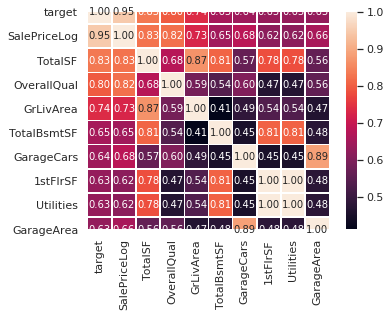

In [56]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'target')['target'].index
cm = np.corrcoef(df_new[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, linewidths=.5, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1]:
from pandas import read_csv
from alys import regression as alysCL
from alys import  save as SV
from graph import rViz 
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import csv
from biglearn import createNewPred as CP
from biglearn import analyserML as ML

In [5]:
df_new = read_csv("new_Basetrain.csv")
df_new = df_new.drop(columns = "SalePriceLog")
df_new.to_csv("new_Basetrain2.csv")

In [7]:
CP.newDataSet()

Nom du fichier full train : new_Basetrain2.csv
valeur split train : 0.8
valeur split test : 0.2
Model selectioné : ensemble
Nom du champs objectif : target
Nom du fichier exporté : ML_pred4.csv
split ok
predict-lancée
prediction ok


In [9]:
df = read_csv('Pred_Files/ML_pred4.csv')
alysCL.regr(df)

nom colonne prediction : pred
nom colonne output : target
MAPE =  6.24


,field1,Id,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,...,YearRemodAdd,YrSold,TotalSF,T_garage,T_Overall,target,pred,pourcerror,errorabs,mape
0,4,5,1145,1053,0,1,4,0,4,0,...,2000,2,3343,15,12,250000,268530.72190,0.074123,0.07,6.24
1,6,7,1694,0,0,1,3,0,4,0,...,2005,1,3380,14,12,307000,300140.20000,-0.022345,0.02,NaN
2,9,10,1077,0,0,1,2,1,4,3,...,1950,2,2068,10,10,118000,122750.55556,0.040259,0.04,NaN
3,14,15,1253,0,0,1,2,0,4,3,...,1960,2,2506,13,10,157000,156666.32085,-0.002125,0.00,NaN
4,20,21,1158,1218,0,1,4,0,4,0,...,2006,0,3534,15,12,325300,324817.31353,-0.001484,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1420,1428,1048,510,0,0,3,0,4,3,...,1950,2,2471,14,10,140000,142753.40706,0.019667,0.02,NaN
286,1435,1443,1026,981,0,1,3,0,4,0,...,2008,3,3024,13,14,310000,309076.38095,-0.002979,0.00,NaN
287,1439,1447,1188,0,0,1,3,0,4,3,...,1962,4,2376,14,11,157900,148528.75658,-0.059349,0.06,NaN
288,1440,1448,1220,870,0,1,3,0,4,3,...,1996,1,3310,14,12,240000,249496.32682,0.039568,0.04,NaN


In [10]:
alysCL.posneg(df)

On a 137 erreurs positive, 153 erreurs negative, 0 prediction parfaite


,field1,Id,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,...,T_garage,T_Overall,target,pred,pourcerror,errorabs,mape,positive erreur,negatif erreur,prediction parfaite
0,4,5,1145,1053,0,1,4,0,4,0,...,15,12,250000,268530.72190,0.074123,0.07,6.24,137.0,153.0,0.0
1,6,7,1694,0,0,1,3,0,4,0,...,14,12,307000,300140.20000,-0.022345,0.02,NaN,NaN,NaN,NaN
2,9,10,1077,0,0,1,2,1,4,3,...,10,10,118000,122750.55556,0.040259,0.04,NaN,NaN,NaN,NaN
3,14,15,1253,0,0,1,2,0,4,3,...,13,10,157000,156666.32085,-0.002125,0.00,NaN,NaN,NaN,NaN
4,20,21,1158,1218,0,1,4,0,4,0,...,15,12,325300,324817.31353,-0.001484,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1420,1428,1048,510,0,0,3,0,4,3,...,14,10,140000,142753.40706,0.019667,0.02,NaN,NaN,NaN,NaN
286,1435,1443,1026,981,0,1,3,0,4,0,...,13,14,310000,309076.38095,-0.002979,0.00,NaN,NaN,NaN,NaN
287,1439,1447,1188,0,0,1,3,0,4,3,...,14,11,157900,148528.75658,-0.059349,0.06,NaN,NaN,NaN,NaN
288,1440,1448,1220,870,0,1,3,0,4,3,...,14,12,240000,249496.32682,0.039568,0.04,NaN,NaN,NaN,NaN


In [11]:
df.sort_values("errorabs", axis = 0, ascending = False)

,field1,Id,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,...,T_garage,T_Overall,target,pred,pourcerror,errorabs,mape,positive erreur,negatif erreur,prediction parfaite
133,628,633,1411,0,0,1,3,0,4,3,...,12,11,82500,161627.02381,0.959115,0.96,NaN,NaN,NaN,NaN
167,807,813,1044,0,0,1,2,0,4,0,...,15,9,55993,81831.73095,0.461464,0.46,NaN,NaN,NaN,NaN
124,577,582,2042,0,0,1,3,0,4,3,...,15,12,253293,363244.19667,0.434087,0.43,NaN,NaN,NaN,NaN
237,1177,1183,2411,2065,0,1,4,0,4,0,...,13,14,745000,457566.52762,-0.385817,0.39,NaN,NaN,NaN,NaN
259,1287,1293,1378,994,0,1,4,0,4,3,...,13,8,107500,147191.86096,0.369227,0.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,259,263,1212,0,0,1,3,0,1,0,...,15,12,151000,150610.50224,-0.002579,0.00,NaN,NaN,NaN,NaN
261,1299,1306,1652,0,0,1,2,0,4,3,...,12,13,325000,326474.06634,0.004536,0.00,NaN,NaN,NaN,NaN
123,575,580,1050,745,0,0,4,0,4,3,...,10,9,131500,131008.85672,-0.003735,0.00,NaN,NaN,NaN,NaN
263,1307,1314,1422,1177,0,1,4,0,4,3,...,13,13,333168,332983.69798,-0.000553,0.00,NaN,NaN,NaN,NaN


In [12]:
SV.extraction(df)

nom du fichier.ex : analyse2.csv
Extraction commencé
Extraction terminé


In [13]:
alysCL.seuil_vs_error(df)

valeur du seuil :0.2
il y'a 276 erreurs inférieurs à 0.2, il y'a 14 erreurs supérieurs à 0.2
erreur sous seuil = 95.1724%


95.1724

In [14]:
alysCL.seuil_vs_error(df)

valeur du seuil :0.1
il y'a 239 erreurs inférieurs à 0.1, il y'a 51 erreurs supérieurs à 0.1
erreur sous seuil = 82.4138%


82.4138

label axe X : id
label axe y : erreur
label plot 1 : erreur
label plot 2 : seuil
Graph title : Erreur VS Seuil


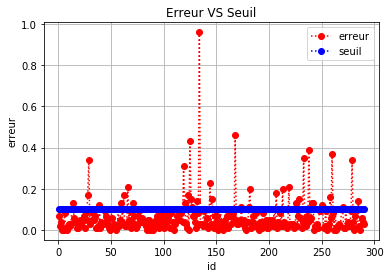

In [16]:
count = 0
for i in df["Id"] :
    count +=1

s = pandas.Series(range(1,(count +1)))
tablex=s    
    
tabley=df["errorabs"]

for i in tablex :
    df["seuil_applique"] = 0.1
    
tabley2 =df["seuil_applique"]
rViz.graph_double(tablex,tabley,tabley2)